# 3. データを前処理する

# 3-1. 訓練データとテストデータへの分類

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
npz = np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_train_raw = npz['X']
y_train_raw = npz['y']

X_valid_raw = npz['X']
y_valid_raw = npz['y']

# 3-2. 標準化・データのレンジ

In [3]:
X_train_scaled = X_train_raw/255.
y_train_scaled = y_train_raw.copy()

X_valid_scaled = X_train_raw/255.
y_valid_scaled = y_train_raw.copy()

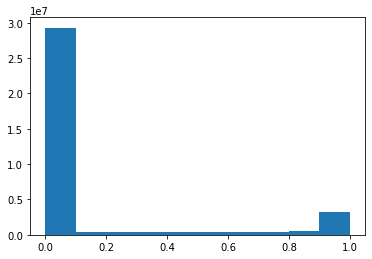

In [4]:
plt.hist(X_train_scaled.ravel())
plt.show()

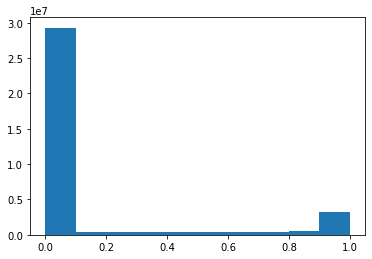

In [5]:
plt.hist(X_valid_scaled.ravel())
plt.show()

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_scaled, y_train_scaled,
                                                     shuffle=True, test_size=0.2, stratify=y_train_scaled)

In [7]:
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train.shape, y_train.shape))
print("Valid data shape, X_valid.shape:{} y_valid.shape:{}".format(X_valid.shape, y_valid.shape))

Train data shape, X_train.shape:(36381, 28, 28) y_train.shape:(36381,)
Valid data shape, X_valid.shape:(9096, 28, 28) y_valid.shape:(9096,)


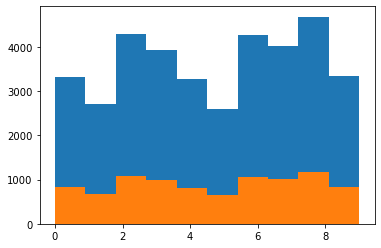

In [8]:
plt.hist(y_train)
plt.hist(y_valid)
plt.show()

# (iii)SVMを用いる

# 4. 訓練データでモデルを学習する

In [9]:
#LinearSVCを用いる
X_train_linearSVC, X_valid_linearSVC = X_train.reshape(-1, 28*28), X_valid.reshape(-1, 28*28)
print(X_train_linearSVC.shape)
print(X_valid_linearSVC.shape)

#インスタンス化
linsvc_clf = LinearSVC()

(36381, 784)
(9096, 784)


In [10]:
linsvc_clf.fit(X_train_linearSVC, y_train)

C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [11]:
#学習のパラメータ
linsvc_clf.coef_.shape

(10, 784)

# 5. 精度を評価する

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [13]:
#精度を評価する
y_train_linearSVC_predict = linsvc_clf.predict(X_train_linearSVC)
y_valid_linearSVC_predict = linsvc_clf.predict(X_valid_linearSVC)

accuracy_linsvc_train = accuracy_score(y_train, y_train_linearSVC_predict)
accuracy_linsvc_valid = accuracy_score(y_valid, y_valid_linearSVC_predict)

print("Train accuracy", accuracy_linsvc_train)
print("Valid accuracy", accuracy_linsvc_valid)

Train accuracy 0.9316676287072923
Valid accuracy 0.912269129287599


In [14]:
matrix_linearSVC_train = confusion_matrix(y_train, y_train_linearSVC_predict)
matrix_linearSVC_train

array([[3249,    0,    6,    4,    5,    9,   14,    2,   25,    3],
       [   0, 2640,   11,    7,    1,    8,    1,    7,   19,    3],
       [  22,   13, 3968,   56,   28,   12,   35,   43,  103,    9],
       [  11,    6,   95, 3561,    5,   86,    9,   33,   82,   35],
       [   3,   10,   16,    4, 3067,    5,   18,    3,   36,  109],
       [  22,    6,   19,   93,   25, 2262,   50,   14,   82,   29],
       [  23,    1,   28,    1,   11,   33, 4135,    2,   25,    2],
       [   8,   11,   35,    7,   27,    5,    4, 3814,   14,   84],
       [  29,   52,   57,  101,   23,   73,   46,   17, 4232,   51],
       [  12,    6,   13,   62,  102,   23,    3,  105,   38, 2967]],
      dtype=int64)

混同行列…行：実際のクラス、列：予測したクラス→対角の成分が予測が的中した件数

In [15]:
matrix_linearSVC_valid = confusion_matrix(y_valid, y_valid_linearSVC_predict)
matrix_linearSVC_valid

array([[ 805,    0,    4,    2,    1,    3,    6,    1,    6,    1],
       [   1,  644,    6,    1,    0,    1,    1,    3,   13,    4],
       [  11,   14,  956,   13,   13,    5,    7,   18,   32,    4],
       [   7,    4,   33,  866,    4,   17,    7,   11,   25,    7],
       [   1,    2,    5,    2,  757,    3,    5,    2,    9,   32],
       [   5,    1,    3,   15,    4,  576,   19,    3,   15,    9],
       [  11,    2,    5,    0,    6,   13, 1010,    3,   14,    1],
       [   0,    3,   15,    3,   10,    4,    2,  934,    3,   29],
       [  12,   23,   16,   33,    4,   24,    7,    9, 1025,   17],
       [   3,    3,    2,   20,   27,    6,    1,   38,    8,  725]],
      dtype=int64)

In [16]:
#適合率
precision_score(y_train, y_train_linearSVC_predict, average="macro")

0.9314064631231831

In [17]:
#再現率
recall_score(y_train, y_train_linearSVC_predict, average="macro")

0.9314803797841529

In [18]:
#適合率
precision_score(y_valid, y_valid_linearSVC_predict, average="macro")

0.911535033749988

In [19]:
#再現率
recall_score(y_valid, y_valid_linearSVC_predict, average="macro")

0.9137833100508873

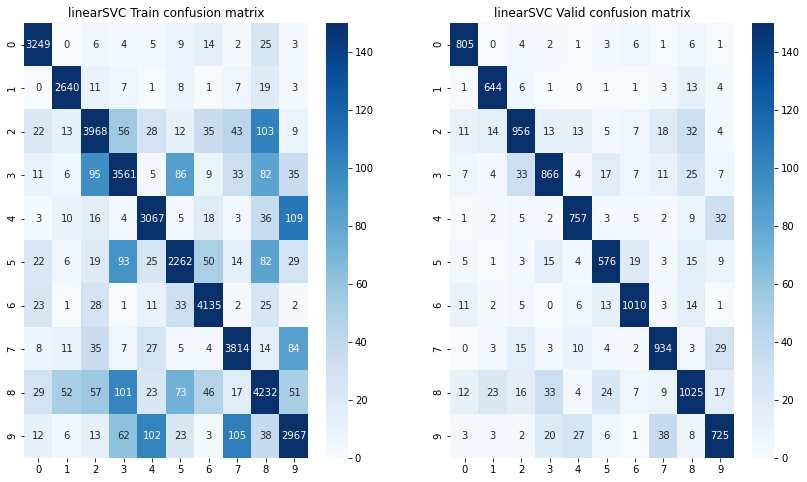

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

sns.heatmap(matrix_linearSVC_train, annot=True, fmt='g', cmap='Blues', vmin=0, vmax=150, ax=axs[0])
sns.heatmap(matrix_linearSVC_valid, annot=True, fmt='g', cmap='Blues', vmin=0, vmax=150, ax=axs[1])

axs[0].set_title("linearSVC Train confusion matrix")
axs[1].set_title("linearSVC Valid confusion matrix")
plt.show()

In [27]:
#標準化
X_train_scaled_linearSVC, X_valid_scaled_linearSVC = X_train_scaled.reshape(-1, 28*28), X_valid_scaled.reshape(-1, 28*28)
print(X_train_scaled_linearSVC.shape)
print(X_valid_scaled_linearSVC.shape)

#インスタンス化
linsvc_clf = LinearSVC()

(45477, 784)
(45477, 784)


In [28]:
linsvc_clf.fit(X_train_scaled_linearSVC, y_train_scaled)

C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [29]:
y_train_scaled_linearSVC_predict = linsvc_clf.predict(X_train_scaled_linearSVC)
y_valid_scaled_linearSVC_predict = linsvc_clf.predict(X_valid_scaled_linearSVC)

accuracy_linsvc_train_scaled = accuracy_score(y_train_scaled, y_train_scaled_linearSVC_predict)
accuracy_linsvc_valid_scaled = accuracy_score(y_valid_scaled, y_valid_scaled_linearSVC_predict)

print("Train Scaled accuracy", accuracy_linsvc_train_scaled)
print("Valid Scaled accuracy", accuracy_linsvc_valid_scaled)

Train Scaled accuracy 0.9296567495657145
Valid Scaled accuracy 0.9296567495657145


In [30]:
matrix_linearSVC_train_scaled = confusion_matrix(y_train_scaled, y_train_scaled_linearSVC_predict)
matrix_linearSVC_train_scaled

array([[4056,    0,   10,    6,    7,   10,   21,    2,   32,    2],
       [   1, 3279,   17,    8,    0,   11,    4,    8,   37,    6],
       [  30,   20, 4940,   68,   47,   12,   44,   57,  130,   14],
       [  12,   13,  125, 4442,    5,  105,   13,   42,  106,   41],
       [   4,   17,   21,    4, 3838,    6,   19,    9,   44,  127],
       [  26,    7,   24,  116,   28, 2829,   69,   15,  102,   36],
       [  26,    2,   29,    3,   24,   47, 5156,    2,   34,    3],
       [  10,   14,   51,   13,   37,    8,    4, 4750,   17,  108],
       [  34,   77,   68,  126,   34,   90,   51,   26, 5280,   65],
       [  17,    8,   19,   81,  127,   25,    4,  134,   41, 3708]],
      dtype=int64)

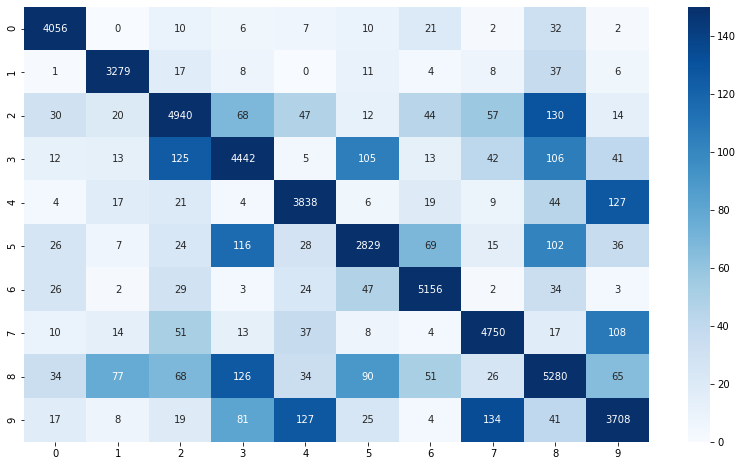

In [31]:
plt.figure(figsize=(14, 8))
sns.heatmap(matrix_linearSVC_train_scaled, annot=True, fmt='g', cmap='Blues', vmin=0, vmax=150)
plt.show()

# 6. 再調整

# 6-1. グリッドサーチの総当たりの範囲

In [32]:
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import(f1_score, make_scorer)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
npz = np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_raw = npz['X']
y_raw = npz['y']

In [34]:
X_train_adj, X_valid_adj, y_train_adj, y_valid_adj = train_test_split(X_raw, y_raw,
                                                      shuffle=True, test_size=0.20, stratify=y_raw)
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train_adj.shape, y_train_adj.shape))
print("Train data shape, X_valid.shape:{} y_valid.shape:{}".format(X_valid_adj.shape, y_valid_adj.shape))

Train data shape, X_train.shape:(36381, 28, 28) y_train.shape:(36381,)
Train data shape, X_valid.shape:(9096, 28, 28) y_valid.shape:(9096,)


In [35]:
X_train = (X_train_adj/255.).reshape(-1, 28*28)
X_valid = (X_valid_adj/255.).reshape(-1, 28*28)
y_train = y_train_adj.copy().reshape(-1, 1)
y_valid = y_valid_adj.copy().reshape(-1, 1)

In [36]:
linsvc_clf = LinearSVC()

param_grid = {
    "penalty":["none", "l2"],
    "C":[0.0, 0.1, 0.3, 0.5, 0.7, 1.0],
}

scoring = {
    "accuracy": make_scorer(accuracy_score),
    "recall": make_scorer(recall_score, average="micro"),
    "precision": make_scorer(precision_score, average="micro"), 
    "f1": make_scorer(f1_score, average="micro"),
}

cv = 5
refit = False
return_train_score = True
verbose = 3

In [39]:
grid_search_v1 = GridSearchCV(
    linsvc_clf,
    param_grid,
    scoring=scoring,
    cv=cv,
    refit=refit, 
    return_train_score=return_train_score,
    verbose=verbose)

In [40]:
grid_search_v1.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.0, penalty=none .............................................
[CV]  C=0.0, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in 

[CV] C=0.0, penalty=none .............................................
[CV]  C=0.0, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=none .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _

[CV]  C=0.0, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=none .............................................
[CV]  C=0.0, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.0, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 966, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn\svm

[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.3s
[CV] C=0.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 966, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn\svm

[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.3s
[CV] C=0.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 966, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn\svm

[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.4s
[CV] C=0.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 966, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn\svm\_liblinear.pyx", line 52, in sklearn.svm._liblinear.train_wrap
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning

[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.3s
[CV] C=0.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 966, in _fit_liblinear
    raw_coef_, n_iter_ = liblinear.train_wrap(
  File "sklearn\svm\_liblinear.pyx", line 52, in sklearn.svm._liblinear.train_wrap
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning

[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.3s
[CV] C=0.1, penalty=none .............................................
[CV]  C=0.1, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.1, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.1, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.1, penalty=none .............................................
[CV]  C=0.1, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.2s
[CV] C=0.1, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.1, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.2s
[CV] C=0.1, penalty=none .............................................
[CV]  C=0.1, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] C=0.1, penalty=l2 ...............................................
[CV]  C=0.1, penalty=l2, accuracy=(train=0.931, test=0.910), f1=(train=0.931, test=0.910), precision=(train=0.931, test=0.910), recall=(train=0.931, test=0.910), total=  12.8s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.1, penalty=l2, accuracy=(train=0.933, test=0.907), f1=(train=0.933, test=0.907), precision=(train=0.933, test=0.907), recall=(train=0.933, test=0.907), total=  11.4s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.1, penalty=l2, accuracy=(train=0.928, test=0.914), f1=(train=0.928, test=0.914), precision=(train=0.928, test=0.914), recall=(train=0.928, test=0.914), total=  11.3s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.1, penalty=l2, accuracy=(train=0.930, test=0.909), f1=(train=0.930, test=0.909), precision=(train=0.930, test=0.909), recall=(train=0.930, test=0.909), total=  11.3s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  C=0.1, penalty=l2, accuracy=(train=0.930, test=0.911), f1=(train=0.930, test=0.911), precision=(train=0.930, test=0.911), recall=(train=0.930, test=0.911), total=  11.4s
[CV] C=0.3, penalty=none .............................................
[CV]  C=0.3, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.3, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.3, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.3, penalty=none .............................................
[CV]  C=0.3, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.3, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.3, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.3, penalty=none .............................................
[CV]  C=0.3, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.3, penalty=l2, accuracy=(train=0.934, test=0.909), f1=(train=0.934, test=0.909), precision=(train=0.934, test=0.909), recall=(train=0.934, test=0.909), total=  25.6s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.3, penalty=l2, accuracy=(train=0.935, test=0.905), f1=(train=0.935, test=0.905), precision=(train=0.935, test=0.905), recall=(train=0.935, test=0.905), total=  27.1s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.3, penalty=l2, accuracy=(train=0.931, test=0.913), f1=(train=0.931, test=0.913), precision=(train=0.931, test=0.913), recall=(train=0.931, test=0.913), total=  27.9s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.3, penalty=l2, accuracy=(train=0.933, test=0.908), f1=(train=0.933, test=0.908), precision=(train=0.933, test=0.908), recall=(train=0.933, test=0.908), total=  24.9s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.3, penalty=l2, accuracy=(train=0.933, test=0.911), f1=(train=0.933, test=0.911), precision=(train=0.933, test=0.911), recall=(train=0.933, test=0.911), total=  25.1s
[CV] C=0.5, penalty=none .............................................
[CV]  C=0.5, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.5, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.5, penalty=none .............................................
[CV]  C=0.5, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.5, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.5, penalty=none .............................................
[CV]  C=0.5, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.5, penalty=l2, accuracy=(train=0.935, test=0.908), f1=(train=0.935, test=0.908), precision=(train=0.935, test=0.908), recall=(train=0.935, test=0.908), total=  26.9s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.5, penalty=l2, accuracy=(train=0.935, test=0.904), f1=(train=0.935, test=0.904), precision=(train=0.935, test=0.904), recall=(train=0.935, test=0.904), total=  26.1s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.5, penalty=l2, accuracy=(train=0.932, test=0.911), f1=(train=0.932, test=0.911), precision=(train=0.932, test=0.911), recall=(train=0.932, test=0.911), total=  26.7s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.5, penalty=l2, accuracy=(train=0.933, test=0.908), f1=(train=0.933, test=0.908), precision=(train=0.933, test=0.908), recall=(train=0.933, test=0.908), total=  26.4s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.5, penalty=l2, accuracy=(train=0.935, test=0.910), f1=(train=0.935, test=0.910), precision=(train=0.935, test=0.910), recall=(train=0.935, test=0.910), total=  26.7s
[CV] C=0.7, penalty=none .............................................
[CV]  C=0.7, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.7, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.7, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.7, penalty=none .............................................
[CV]  C=0.7, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.7, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.7, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.7, penalty=none .............................................
[CV]  C=0.7, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.7, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=0.7, penalty=l2, accuracy=(train=0.935, test=0.907), f1=(train=0.935, test=0.907), precision=(train=0.935, test=0.907), recall=(train=0.935, test=0.907), total=  27.0s
[CV] C=0.7, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.7, penalty=l2, accuracy=(train=0.936, test=0.904), f1=(train=0.936, test=0.904), precision=(train=0.936, test=0.904), recall=(train=0.936, test=0.904), total=  43.7s
[CV] C=0.7, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.7, penalty=l2, accuracy=(train=0.933, test=0.910), f1=(train=0.933, test=0.910), precision=(train=0.933, test=0.910), recall=(train=0.933, test=0.910), total=  28.9s
[CV] C=0.7, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.7, penalty=l2, accuracy=(train=0.934, test=0.908), f1=(train=0.934, test=0.908), precision=(train=0.934, test=0.908), recall=(train=0.934, test=0.908), total=  26.9s
[CV] C=0.7, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=0.7, penalty=l2, accuracy=(train=0.935, test=0.909), f1=(train=0.935, test=0.909), precision=(train=0.935, test=0.909), recall=(train=0.935, test=0.909), total=  32.9s
[CV] C=1.0, penalty=none .............................................
[CV]  C=1.0, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.2s
[CV] C=1.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=1.0, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.2s
[CV] C=1.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=1.0, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.2s
[CV] C=1.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV]  C=1.0, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.2s
[CV] C=1.0, penalty=none .............................................
[CV]  C=1.0, penalty=none, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.2s


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1.0, penalty=l2, accuracy=(train=0.936, test=0.907), f1=(train=0.936, test=0.907), precision=(train=0.936, test=0.907), recall=(train=0.936, test=0.907), total=  29.1s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1.0, penalty=l2, accuracy=(train=0.937, test=0.903), f1=(train=0.937, test=0.903), precision=(train=0.937, test=0.903), recall=(train=0.937, test=0.903), total=  28.1s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1.0, penalty=l2, accuracy=(train=0.933, test=0.910), f1=(train=0.933, test=0.910), precision=(train=0.933, test=0.910), recall=(train=0.933, test=0.910), total=  30.9s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1.0, penalty=l2, accuracy=(train=0.935, test=0.908), f1=(train=0.935, test=0.908), precision=(train=0.935, test=0.908), recall=(train=0.935, test=0.908), total=  32.1s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1.0, penalty=l2, accuracy=(train=0.936, test=0.908), f1=(train=0.936, test=0.908), precision=(train=0.936, test=0.908), recall=(train=0.936, test=0.908), total=  32.4s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 10.7min finished


GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.0, 0.1, 0.3, 0.5, 0.7, 1.0],
                         'penalty': ['none', 'l2']},
             refit=False, return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=micro),
                      'precision': make_scorer(precision_score, average=micro),
                      'recall': make_scorer(recall_score, average=micro)},
             verbose=3)

In [41]:
grid_search_v1.cv_results_

{'mean_fit_time': array([ 0.13220158,  0.32440624,  0.15718217, 11.61835589,  0.11921887,
        26.07997994,  0.11409464, 26.49489379,  0.12440925, 31.83101525,
         0.18122954, 30.48438063]),
 'std_fit_time': array([1.05763663e-02, 2.27687330e-02, 2.46863325e-02, 5.88116595e-01,
        5.60465513e-03, 1.16511368e+00, 3.06895505e-03, 2.75814484e-01,
        6.60268057e-03, 6.30572140e+00, 1.41039440e-02, 1.68340454e+00]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.03704638, 0.        ,
        0.03858657, 0.        , 0.03616261, 0.        , 0.03415194,
        0.        , 0.03791018]),
 'std_score_time': array([0.        , 0.        , 0.        , 0.00215513, 0.        ,
        0.00173739, 0.        , 0.00144274, 0.        , 0.00145254,
        0.        , 0.0081065 ]),
 'param_C': masked_array(data=[0.0, 0.0, 0.1, 0.1, 0.3, 0.3, 0.5, 0.5, 0.7, 0.7, 1.0,
                    1.0],
              mask=[False, False, False, False, False, False, False, False,
  

In [44]:
params = grid_search_v1.cv_results_['params']
accuracy_list = grid_search_v1.cv_results_['mean_test_accuracy']

result_list = []
for param, accuracy in zip(params, accuracy_list):
    param["test_acc"] = accuracy
    result_list.append(param)

In [45]:
df_result_v1 = pd.DataFrame(result_list)
df_result_v1

,C,penalty,test_acc
0,0.0,none,NaN
1,0.0,l2,NaN
2,0.1,none,NaN
3,0.1,l2,0.910283
4,0.3,none,NaN
5,0.3,l2,0.909321
6,0.5,none,NaN
7,0.5,l2,0.908221
8,0.7,none,NaN
9,0.7,l2,0.907809


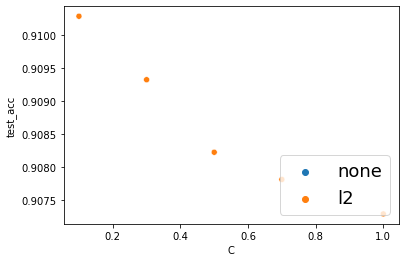

In [46]:
sns.scatterplot(data=df_result_v1, x="C", y="test_acc", hue="penalty")
plt.legend(loc= 'lower right', fontsize=18)
plt.show()

In [47]:
#0.001, 0.005, 0.001, 0.005, 0.1で再試行